# 단일 표본 T-Test

## 준비작업

In [3]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
import numpy as np
from math import sqrt       
from hossam import load_data
# 단일표본 T-Test를 위한 라이브러리
from scipy.stats import t, ttest_1samp, normaltest

## 그래프 초기화

In [4]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

## 예제 - 1 

In [5]:
origin = load_data('dog_temperature')
origin.head()

[data] https://data.hossam.kr/data/lab10/dog_temperature.xlsx
[desc] 강아지 25마리의 체온을 측정한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,체온
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1


### 신뢰구간 확인

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25284\745156294.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data = data, fill = False,


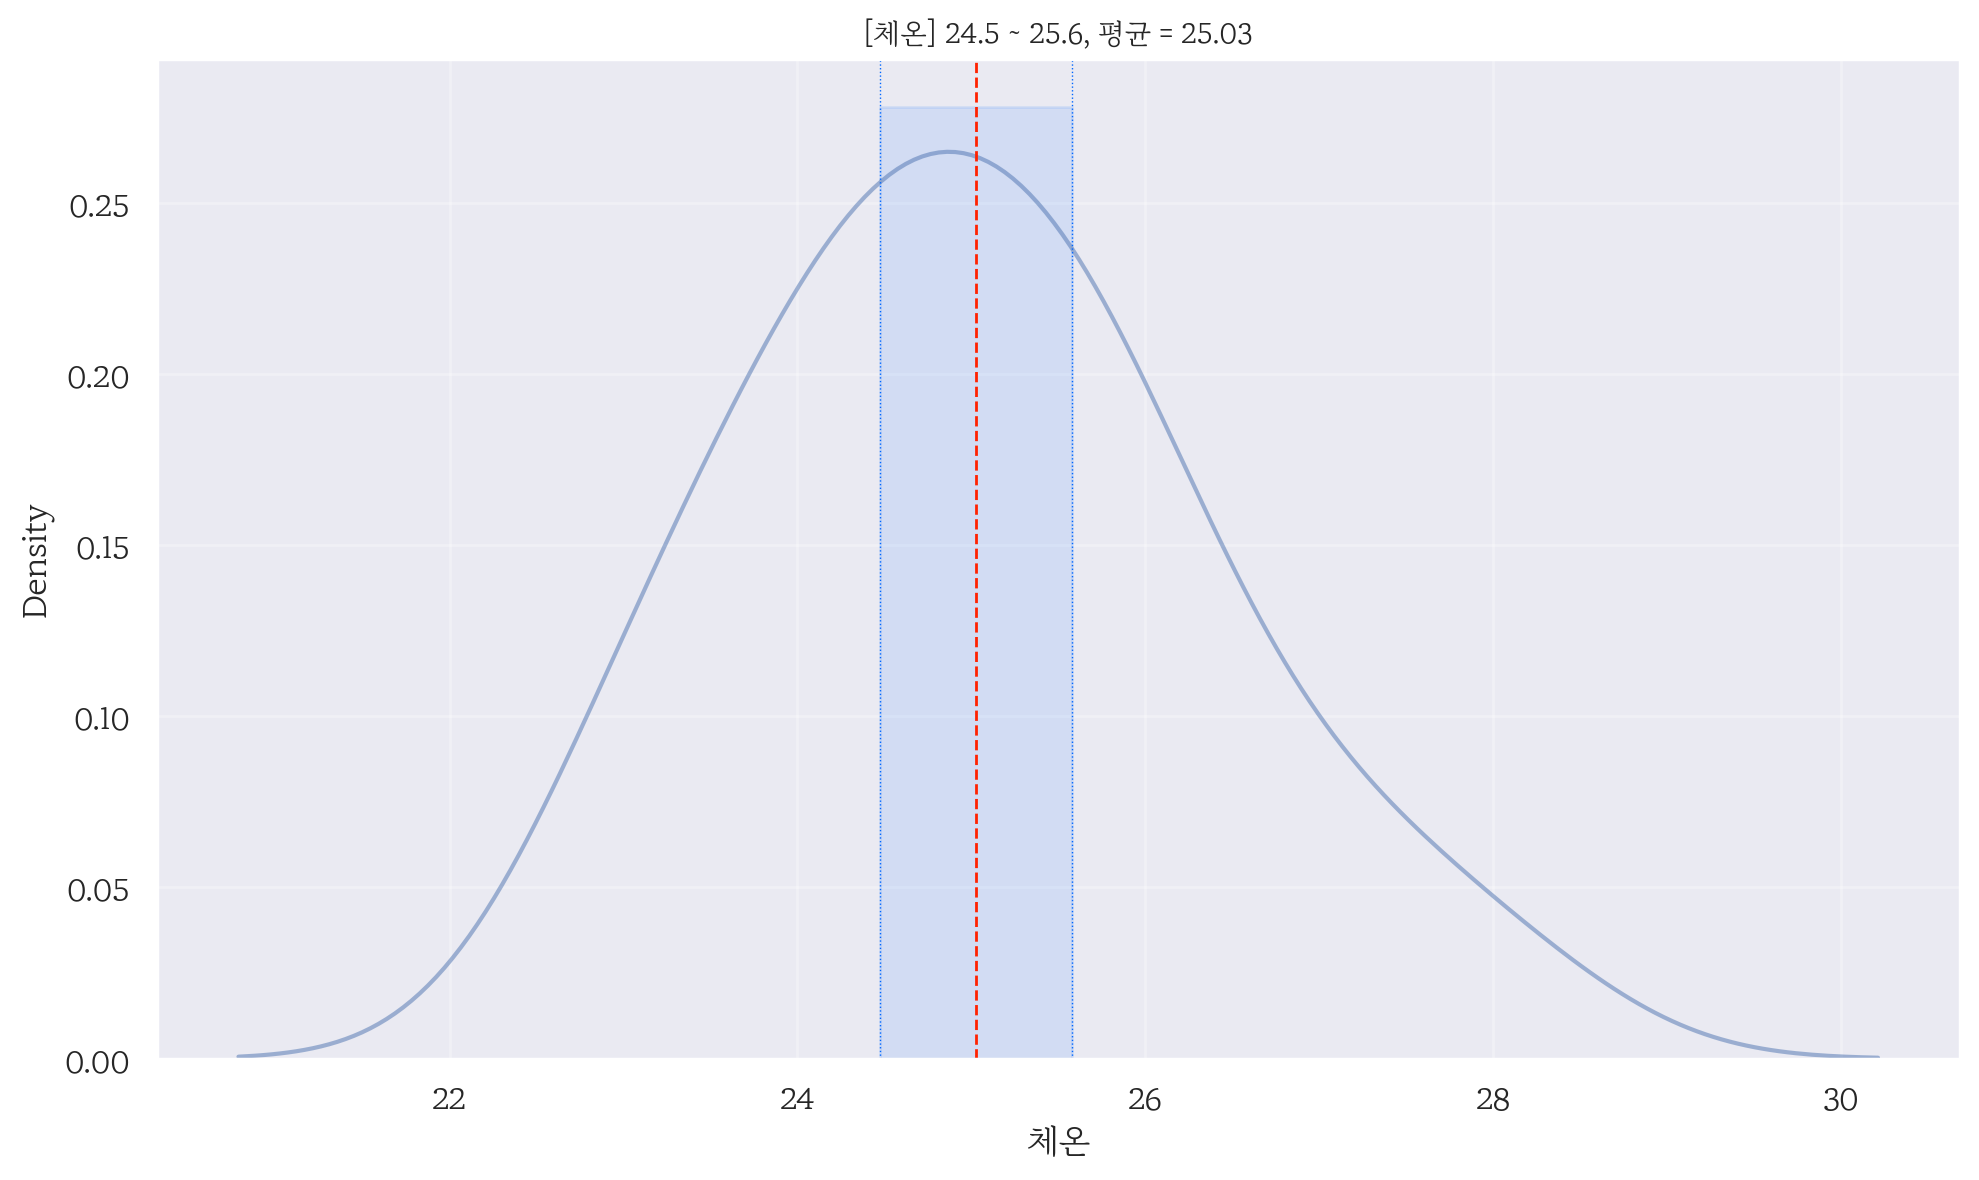

In [6]:
data = origin['체온']
max = data.max()                        # 최대값
clevel = 0.95                           # 신뢰수준
dof = len(data) - 1                     # 자유도
sp_mean = data.mean()                   # 표본평균
sp_std = data.std(ddof = 1)             # 표본표준편차
sp_std_error = sp_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

width_px = 2000
height_px = 1200
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# kdeplot 그리기 
sb.kdeplot(data = data, fill = False,
           alpha = 0.5, palette='pastel')

# 신뢰구간 범위 그리기
ax.axvline(cmin, linestyle = ':', color = '#0066ff', linewidth = 0.5)
ax.axvline(cmax, linestyle = ':', color = '#0066ff', linewidth = 0.5)

# 현재 축 범위 가져오기
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha = 0.1, color = '#0066ff88')

# 평균 표시
ax.axvline(sp_mean, linestyle = '--', linewidth = 1, color = '#ff2200')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3)
ax.set_title(f'[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균 = {sp_mean:0.2f}', fontsize = 10)

# 출력
plt.tight_layout()
plt.show()
plt.close()

### 데이터의 정규성 검정

In [7]:
s, p = normaltest(origin['체온'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p > 0.05)

'statistic: 0.819, p-value: 0.664, 정규성 충족 여부: True'

### t검정 수행

In [8]:
s, p = ttest_1samp(origin['체온'], 24.3)
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: 2.713, p-value: 0.012, 대립가설 채택'

## 예제 - 2

In [9]:
origin = load_data('insur')
origin.head()

[data] https://data.hossam.kr/data/lab10/insur.xlsx
[desc] 어느 보험회사에서 한해 동안 모집한 가입원들에 대한 가입 정보 (출처: 방송통신대학교 통계학개론)

field     description
--------  ------------------------------------------------------
직업      1=육체노동, 2=정신노동(직상인), 3=자영업
교육수준  1=초등학교 이하, 2=중졸 및 고졸, 3=대졸, 4=대학원 졸업
성별      1=남자, 2=여자
나이      숫자
가입금액  단위=천만원
월수입    단위=만원



,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150
2,2,3,2,36,8.0,120
3,3,4,2,38,12.0,140
4,1,1,1,45,10.0,150


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25284\3654847672.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data = data, fill = False,


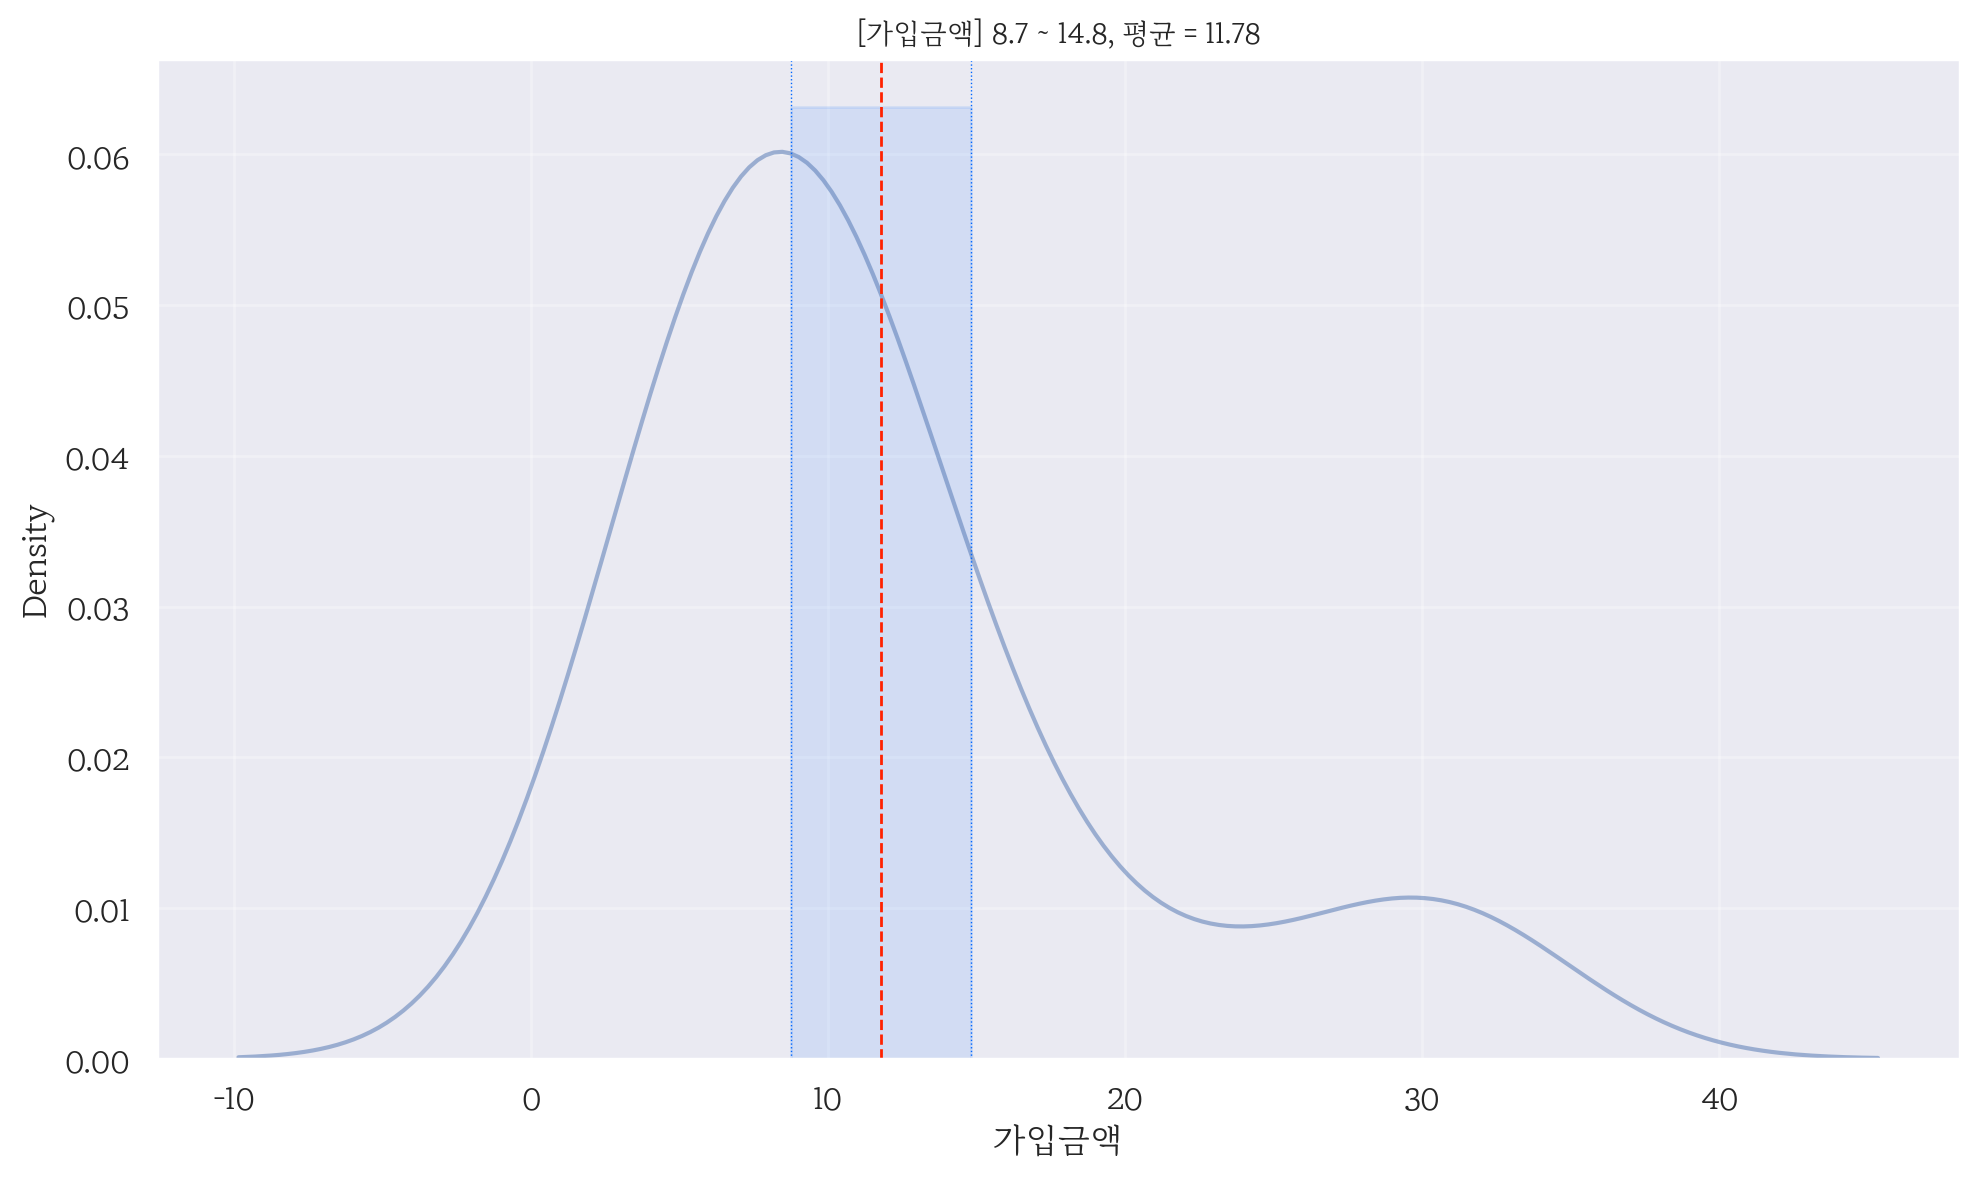

In [10]:
data = origin['가입금액']
max = data.max()                        # 최대값
clevel = 0.95                           # 신뢰수준
dof = len(data) - 1                     # 자유도
sp_mean = data.mean()                   # 표본평균
sp_std = data.std(ddof = 1)             # 표본표준편차
sp_std_error = sp_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

width_px = 2000
height_px = 1200
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# kdeplot 그리기 
sb.kdeplot(data = data, fill = False,
           alpha = 0.5, palette='pastel')

# 신뢰구간 범위 그리기
ax.axvline(cmin, linestyle = ':', color = '#0066ff', linewidth = 0.5)
ax.axvline(cmax, linestyle = ':', color = '#0066ff', linewidth = 0.5)

# 현재 축 범위 가져오기
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha = 0.1, color = '#0066ff88')

# 평균 표시
ax.axvline(sp_mean, linestyle = '--', linewidth = 1, color = '#ff2200')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3)
ax.set_title(f'[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균 = {sp_mean:0.2f}', fontsize = 10)

# 출력
plt.tight_layout()
plt.show()
plt.close()

In [11]:
s, p = normaltest(origin['가입금액']) # '제시된 값', alternative = 'less, greater')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p > 0.05)

'statistic: 11.438, p-value: 0.003, 정규성 충족 여부: False'

### 정규성을 충족하지 않는경우 
--> 로그변환을 통해 정규성 충족 가능

In [12]:
log_data = np.log(origin['가입금액'])
log_data
target_value = np.log(10)

In [13]:
s, p = normaltest(log_data)       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p > 0.05)

'statistic: 0.104, p-value: 0.950, 정규성 충족 여부: True'

In [14]:
s, p = ttest_1samp(log_data, target_value)       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: -0.326, p-value: 0.747, 귀무가설 채택'

## 연습문제

In [15]:
origin = load_data('bread')
origin.head()

[data] https://data.hossam.kr/data/lab10/bread.xlsx
[desc] 매일 아침 동네 빵집에서 식빵을 구입해 무게를 기록한 데이터
[!] Cannot read metadata


,무게
0,482
1,479
2,485
3,474
4,479


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25284\1358459005.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data = data, fill = False,


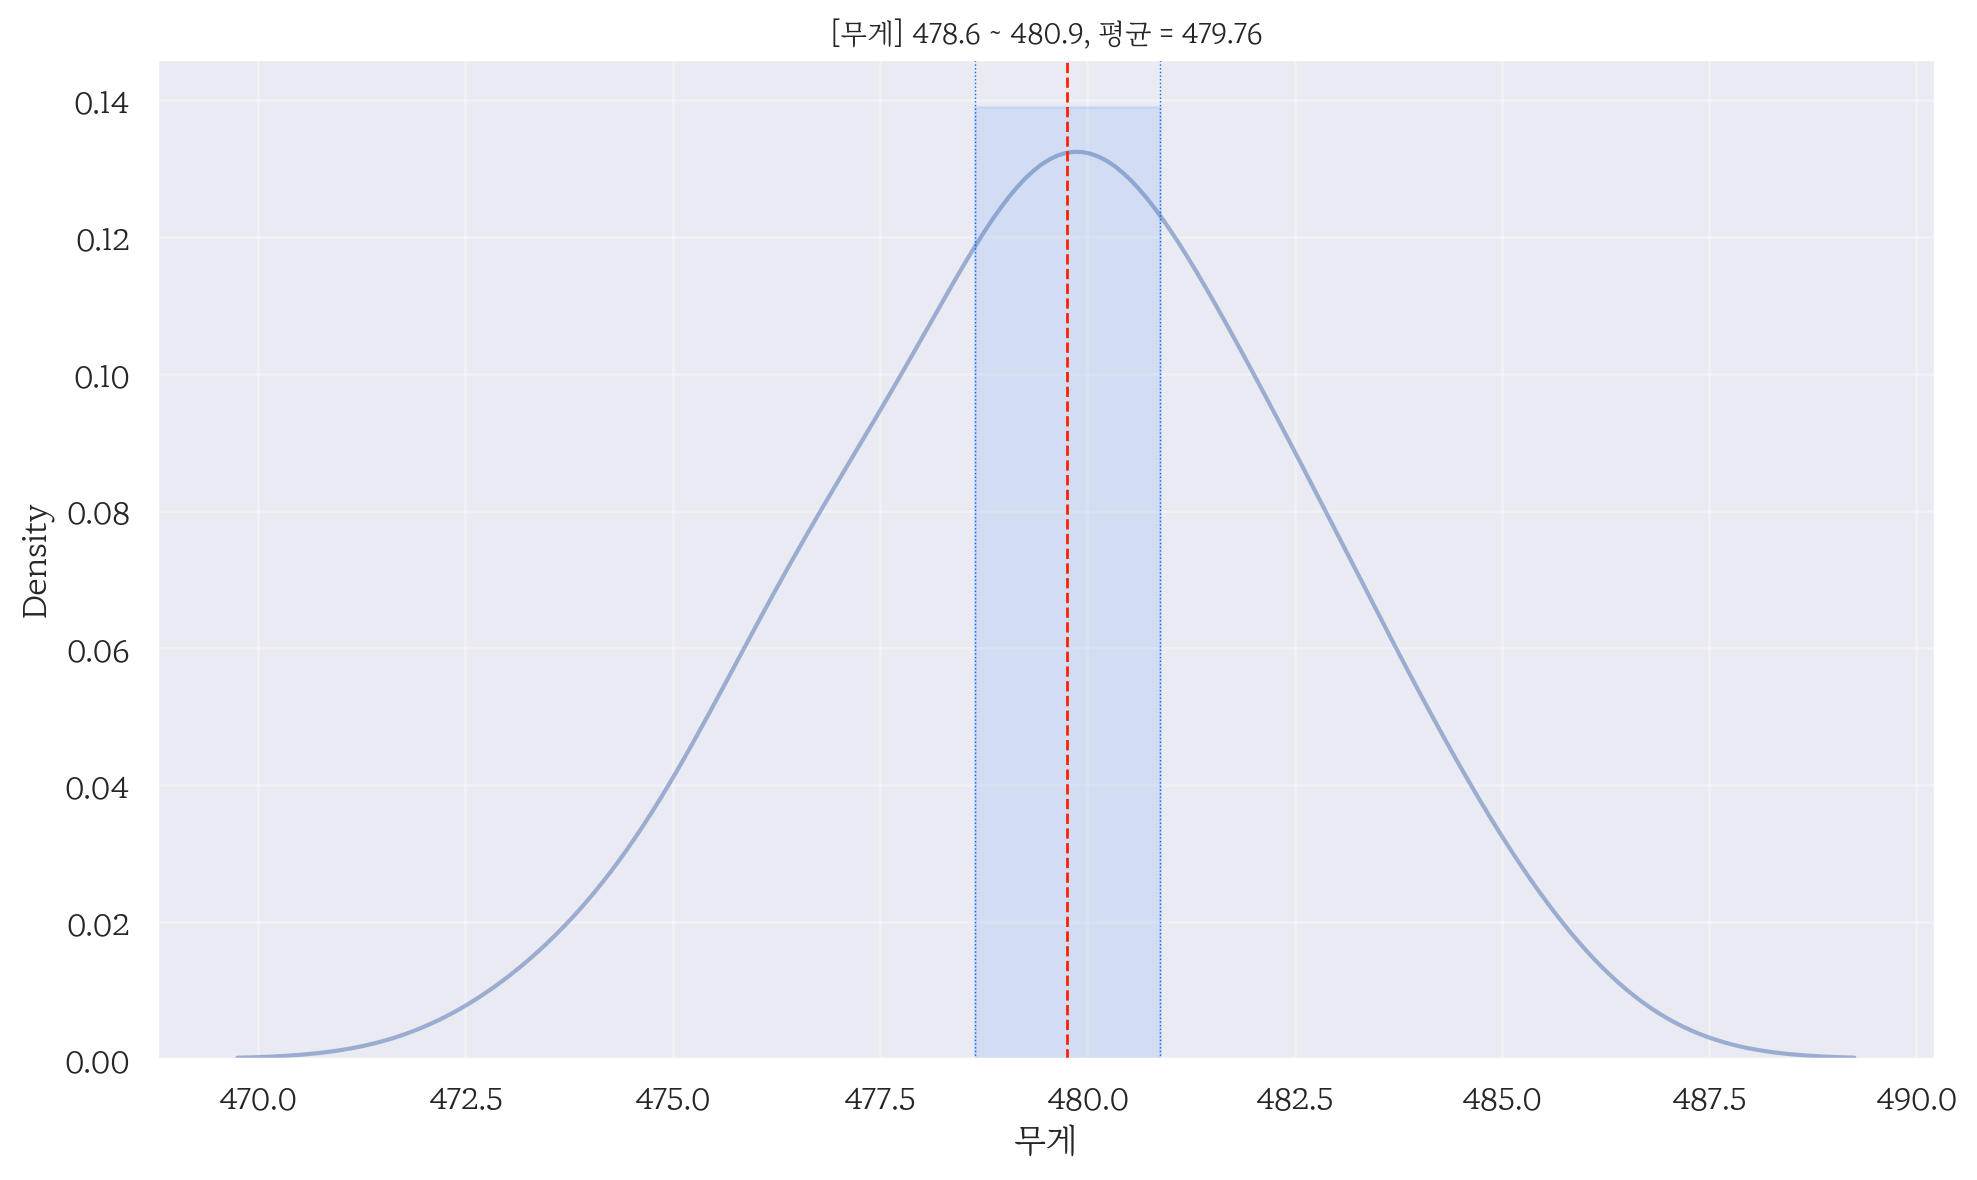

In [ ]:
data = origin['무게']
max = data.max()                        # 최대값
clevel = 0.95                           # 신뢰수준
dof = len(data) - 1                     # 자유도
sp_mean = data.mean()                   # 표본평균
sp_std = data.std(ddof = 1)             # 표본표준편차
sp_std_error = sp_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

width_px = 2000
height_px = 1200
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# kdeplot 그리기 
sb.kdeplot(data = data, fill = False,
           alpha = 0.5, palette='pastel')

# 신뢰구간 범위 그리기
ax.axvline(cmin, linestyle = ':', color = '#0066ff', linewidth = 0.5)
ax.axvline(cmax, linestyle = ':', color = '#0066ff', linewidth = 0.5)

# 현재 축 범위 가져오기
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha = 0.1, color = '#0066ff88')

# 평균 표시
ax.axvline(sp_mean, linestyle = '--', linewidth = 1, color = '#ff2200')


# 텍스트 그리기
ax.text(x = (cmax-cmin)/2+cmin,
        y = ymax,
    s = '[%s]%0.1f ~ %0.1f'
# 그래프 꾸미기
ax.grid(True, alpha = 0.3)
ax.set_title(f'[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균 = {sp_mean:0.2f}', fontsize = 10)

# 출력
plt.tight_layout()
plt.show()
plt.close()

In [17]:
s, p = normaltest(origin['무게']) # '제시된 값', alternative = 'less, greater')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p > 0.05)

'statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True'

In [20]:
s, p = ttest_1samp(origin['무게'], 500)       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: -37.524, p-value: 0.000, 대립가설 채택'

In [21]:
s, p = ttest_1samp(origin['무게'], 500, alternative ='less')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: -37.524, p-value: 0.000, 대립가설 채택'

In [23]:
s, p = ttest_1samp(origin['무게'], 500, alternative = 'greater')       # 제시된 값 = t검정에서만 
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s, p, '대립' if p < 0.05 else '귀무')

'statistic: -37.524, p-value: 1.000, 귀무가설 채택'

### 컴플레인 해야할까?
- p-value > 0.05로 정규성 충족
- 표본평균이 신뢰구간에 포함되어 있으므로, 빵 무게는 정상범위에 있다
- 빵의 평균적인 무게는 500g보다 작은 대립가설을 채택한다. 즉, 빵 무게는 500g보다 작다
- 통계학적으로는 컴플레인 하는 것이 옳다고 생각은 하나, 빵의 제조 전 무게인지 제조 후 무게인지 문제에 명시되어 있지 않으므로 컴플레인을 추천하진 않는다